In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np
import random
import math
%matplotlib inline

Функция для генерирования цвета

In [11]:
symbols = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
def color_generator() :
    col = '#'
    for i in range(6) :
        col += (symbols[random.randint(0, 15)])
    return col

Загружаем нашу выборку

In [1]:
file_descr = open('/Users/semenfedotov/Downloads/viborkaWeinbulla.txt')
data = file_descr.readlines()
data = [float(x) for x in data]
data = map(lambda x : 10 ** -4 if x == 0 else x, data)


In [13]:
print len(data)


3652


Введем логарифмическую функцию правдоподобия, для оценки методом МП

In [14]:
def likelyhood(k, size) :    
    return sum([math.log(float(k)) + (k - 1.) * math.log(float(x)) + (-1.)\
                * (float(x)) ** k for x in data[:(size + 1)]])

In [15]:
dots = np.logspace(-2, 2, 99990, base = 10)
print len(dots)
dots

99990


array([  1.00000000e-02,   1.00009212e-02,   1.00018424e-02, ...,
         9.99815790e+01,   9.99907891e+01,   1.00000000e+02])

In [16]:
chetire_10 = int(len(data) / 10. * 4.) + 1
chetire_10

1461

In [17]:
full = len(data)

Далее, подсчитаем точки, на которых достигается максимум.
Сначала на $\frac{4}{10}$ размера выборки, а потом на всей

In [18]:
res_chetire_10 = np.argmax([likelyhood(dot, chetire_10) for dot in dots])

In [22]:
res_chetire_10

66616

In [24]:
dots[res_chetire_10]

4.6230984574842315

In [25]:
res_full = np.argmax([likelyhood(dot, full) for dot in dots])

In [26]:
res_full

66459

In [27]:
dots[res_full]

4.5567211412183646

## Строим гистограмму нашей выборки и график плотности распределения Вейбула с параметром, вычисленным нами

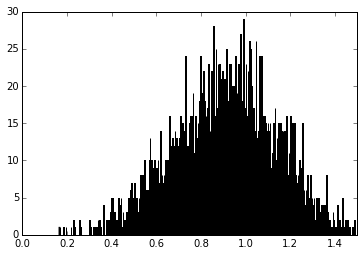

In [28]:
plt.hist(data, 500, color = color_generator())
plt.xlim(0, 1.5)
plt.show()

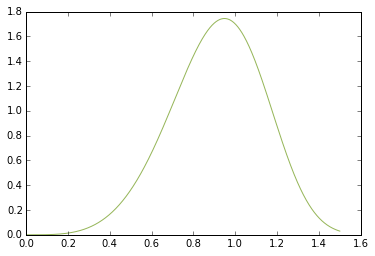

In [29]:
dots_for_pdf = np.linspace(0, 1.5, 1000)
plt.plot(dots_for_pdf, [scipy.stats.weibull_min.pdf(x, dots[res_chetire_10]) for x in dots_for_pdf], color = color_generator())
plt.show()

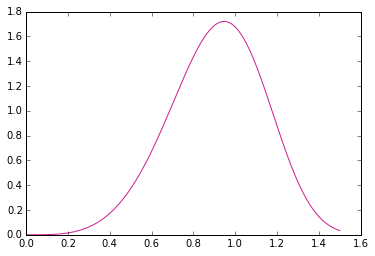

In [30]:
dots_for_pdf = np.linspace(0, 1.5, 1000)
plt.plot(dots_for_pdf, [scipy.stats.weibull_min.pdf(x, dots[res_full]) for x in dots_for_pdf], color = color_generator())
plt.show()

# Убедимся, что гистограмма нашей выборки очень хорошо приближается графиком плотности


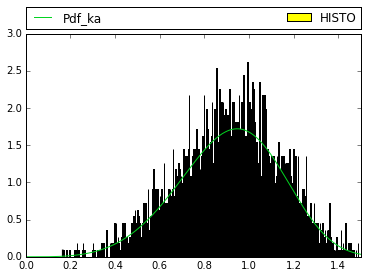

In [35]:
plt.hist(data, 500, label = 'HISTO', normed = 1, color = 'yellow')
plt.xlim(0, 1.5)
plt.plot(dots_for_pdf, [scipy.stats.weibull_min.pdf(x, dots[res_full]) for x in dots_for_pdf], label = 'Pdf_ka', color = color_generator())
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()